In [3]:
# Import necessary libraries
import pandas as pd

# Load dataset into a pandas DataFrame
data = pd.read_csv("C:/Users/Admin/Desktop/Projects/Estimates of the components of demographic growth, annual/Component Of Demographic Growth.csv") 





C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\3310347247.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  canada_data = canada_data.groupby(['Year', 'Components of population growth']).sum().reset_index()


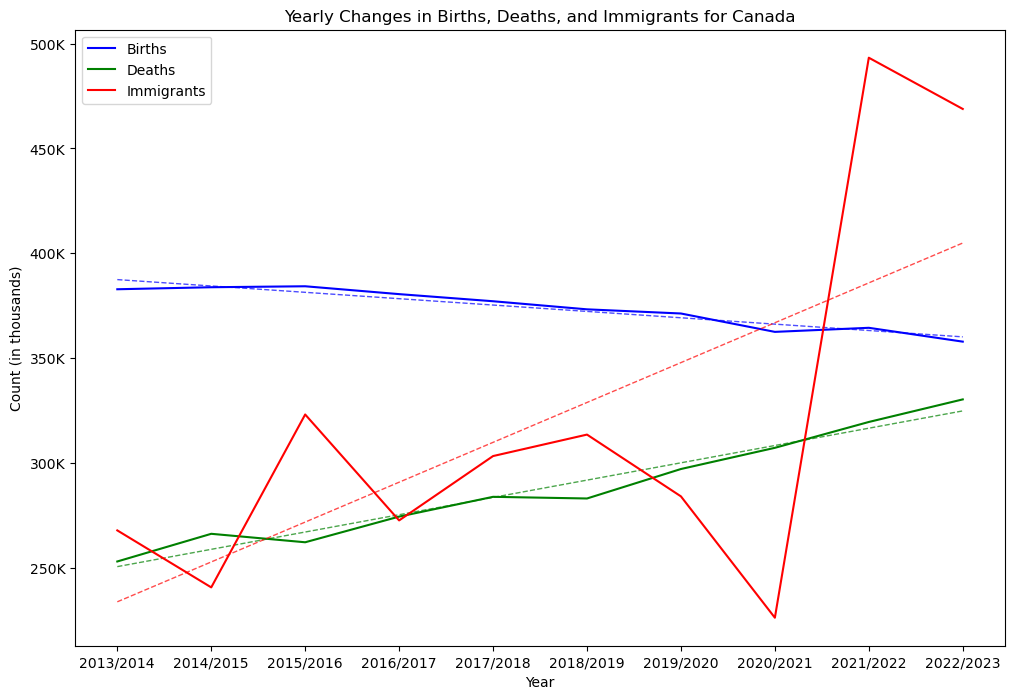

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Aggregate data for Canada
canada_data = data[data['Province'] != 'Canada']  # Exclude the existing "Canada" entries
canada_data = canada_data.groupby(['Year', 'Components of population growth']).sum().reset_index()
canada_data['Province'] = 'Canada'

# Create a line graph
plt.figure(figsize=(12, 8))

components = ['Births', 'Deaths', 'Immigrants']
colors = ['b', 'g', 'r']

for i, component in enumerate(components):
    component_data = canada_data[canada_data['Components of population growth'] == component]
    plt.plot(component_data['Year'], component_data['Persons'] / 1000, label=component, color=colors[i])

    # Add trend lines for each line
    z = np.polyfit(component_data.index, component_data['Persons'] / 1000, 1)
    p = np.poly1d(z)
    plt.plot(component_data['Year'], p(component_data.index), linestyle='--', linewidth=1, alpha=0.7, color=colors[i])

plt.title('Yearly Changes in Births, Deaths, and Immigrants for Canada')
plt.xlabel('Year')
plt.ylabel('Count (in thousands)')  # Updated y-axis label
plt.legend()

# Remove grid lines
plt.grid(False)

# Format y-axis labels to use 'K' to indicate thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:.0f}K'))

plt.show()

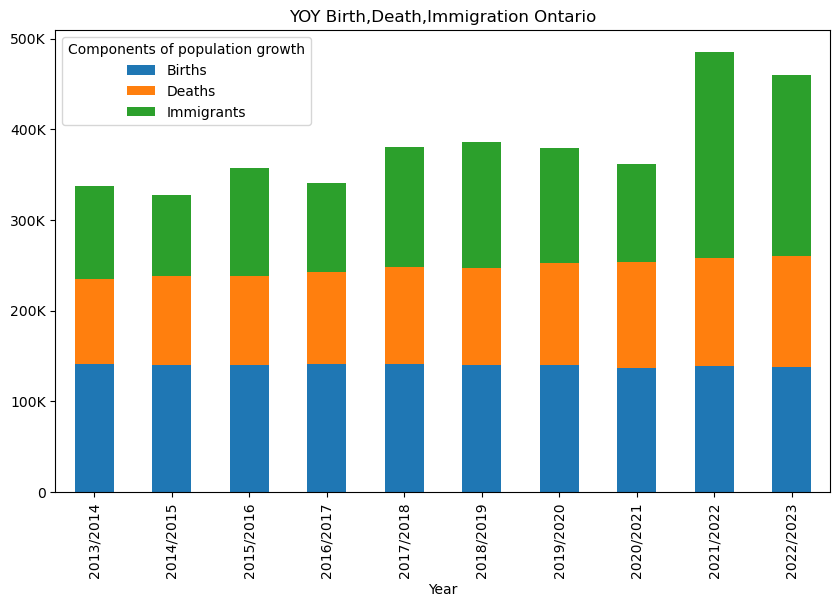

In [46]:
# Fill missing values with 0 (if any)
aggregated_data.fillna(0, inplace=True)

province_to_plot = 'Ontario'
province_data = aggregated_data[aggregated_data['Province'] == province_to_plot]
province_data.set_index('Year').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'YOY Birth,Death,Immigration {province_to_plot}')
plt.xlabel('Year')

# Remove grid lines
plt.grid(False)

# Format y-axis labels to use 'K' for thousands and transform 200,000 to 200K
def format_y_ticks(x, pos):
    if x >= 1000:
        return f'{int(x / 1000)}K'
    return str(int(x))

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y_ticks))

# Remove y-label
plt.ylabel('')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\2458744285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Immigrants'].pct_change() * 100


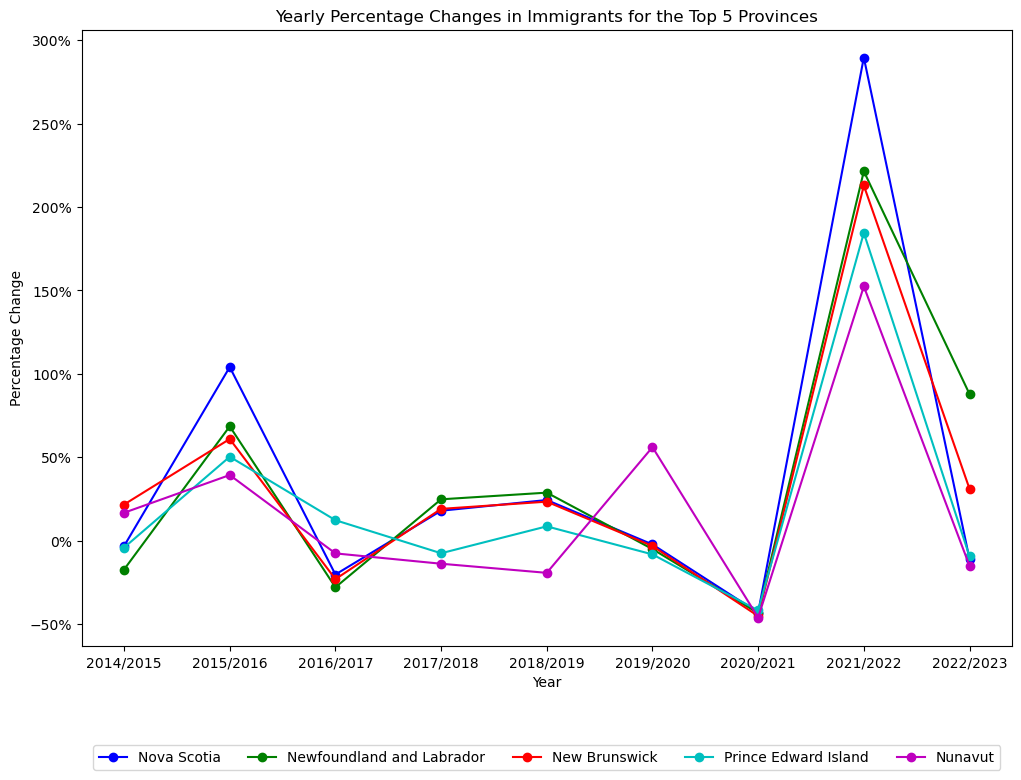

In [59]:
# Calculate the percentage change in immigrants for each province
immigrant_data = aggregated_data[['Province', 'Year', 'Immigrants']]
immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Immigrants'].pct_change() * 100

# Step 3: Calculate the average percentage change for each province
average_changes = immigrant_data.groupby('Province')['Percentage Change'].mean().reset_index()

# Select the top 5 provinces based on the average percentage change
top5_provinces = average_changes.nlargest(5, 'Percentage Change')['Province']

# Step 4: Create a line graph with different lines for the top 5 provinces
plt.figure(figsize=(12, 8))

# Define a list of line colors for the top 5 provinces
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each province's data with a different line color
for i, province in enumerate(top5_provinces):
    province_data = immigrant_data[immigrant_data['Province'] == province]
    
    # Cycle through colors to ensure enough colors for the top 5 provinces
    color = colors[i]
    
    plt.plot(province_data['Year'], province_data['Percentage Change'], marker='o', label=province, color=color)

plt.title('Yearly Percentage Changes in Immigrants for the Top 5 Provinces')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))  # Add '%' to each value on the y-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\889775099.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Immigrants'].pct_change() * 100


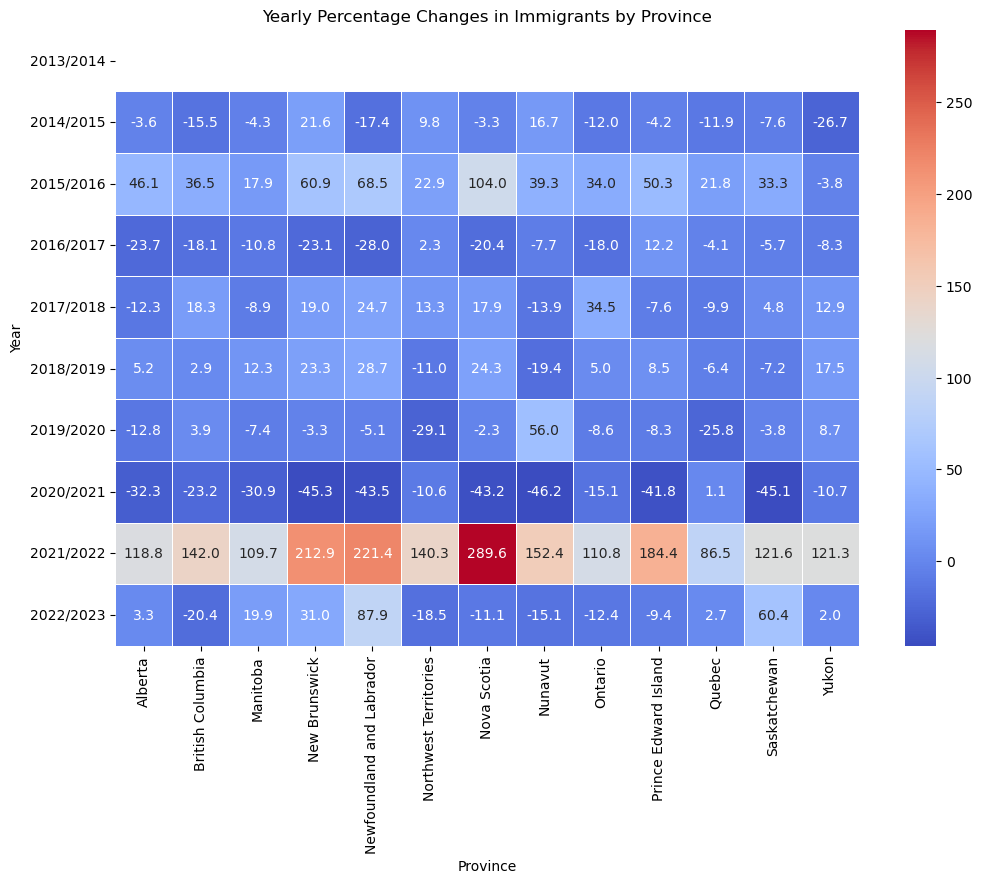

In [16]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Data Aggregation
# Pivot the data to have 'Immigrants' as a separate column for each province and year
aggregated_data = data.pivot(index=['Province', 'Year'], columns='Components of population growth', values='Persons').reset_index()

# Fill missing values with 0 (if any)
aggregated_data.fillna(0, inplace=True)

# Calculate the percentage change in immigrants for each province
immigrant_data = aggregated_data[['Province', 'Year', 'Immigrants']]
immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Immigrants'].pct_change() * 100

# Step 3: Create a heatmap
plt.figure(figsize=(12, 8))

# Pivot the data to a format suitable for a heatmap
heatmap_data = immigrant_data.pivot(index='Year', columns='Province', values='Percentage Change')

# Create a heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)

plt.title('Yearly Percentage Changes in Immigrants by Province')
plt.xlabel('Province')
plt.ylabel('Year')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\872152892.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_data['Percentage Change'] = birth_data.groupby('Province')['Births'].pct_change() * 100


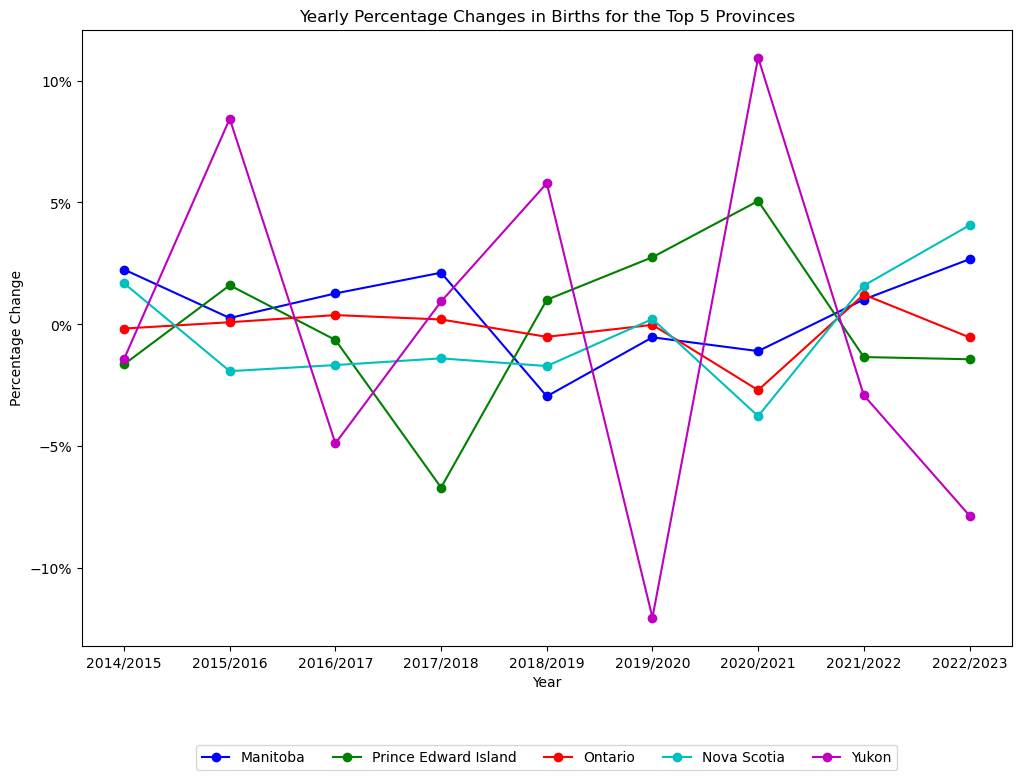

In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

aggregated_data = data.pivot(index=['Province', 'Year'], columns='Components of population growth', values='Persons').reset_index()

# Fill missing values with 0 (if any)
aggregated_data.fillna(0, inplace=True)

# Calculate the percentage change in births for each province
birth_data = aggregated_data[['Province', 'Year', 'Births']]
birth_data['Percentage Change'] = birth_data.groupby('Province')['Births'].pct_change() * 100

# Step 3: Calculate the average percentage change for each province
average_changes = birth_data.groupby('Province')['Percentage Change'].mean().reset_index()

# Select the top 5 provinces based on the average percentage change
top5_provinces = average_changes.nlargest(5, 'Percentage Change')['Province']

# Step 4: Create a line graph with different lines for the top 5 provinces
plt.figure(figsize=(12, 8))

# Define a list of line colors for the top 5 provinces
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each province's data with a different line color
for i, province in enumerate(top5_provinces):
    province_data = birth_data[birth_data['Province'] == province]

    # Cycle through colors to ensure enough colors for the top 5 provinces
    color = colors[i]

    plt.plot(province_data['Year'], province_data['Percentage Change'], marker='o', label=province, color=color)

plt.title('Yearly Percentage Changes in Births for the Top 5 Provinces')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.grid(False)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\2433296648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_data['Percentage Change'] = death_data.groupby('Province')['Deaths'].pct_change() * 100


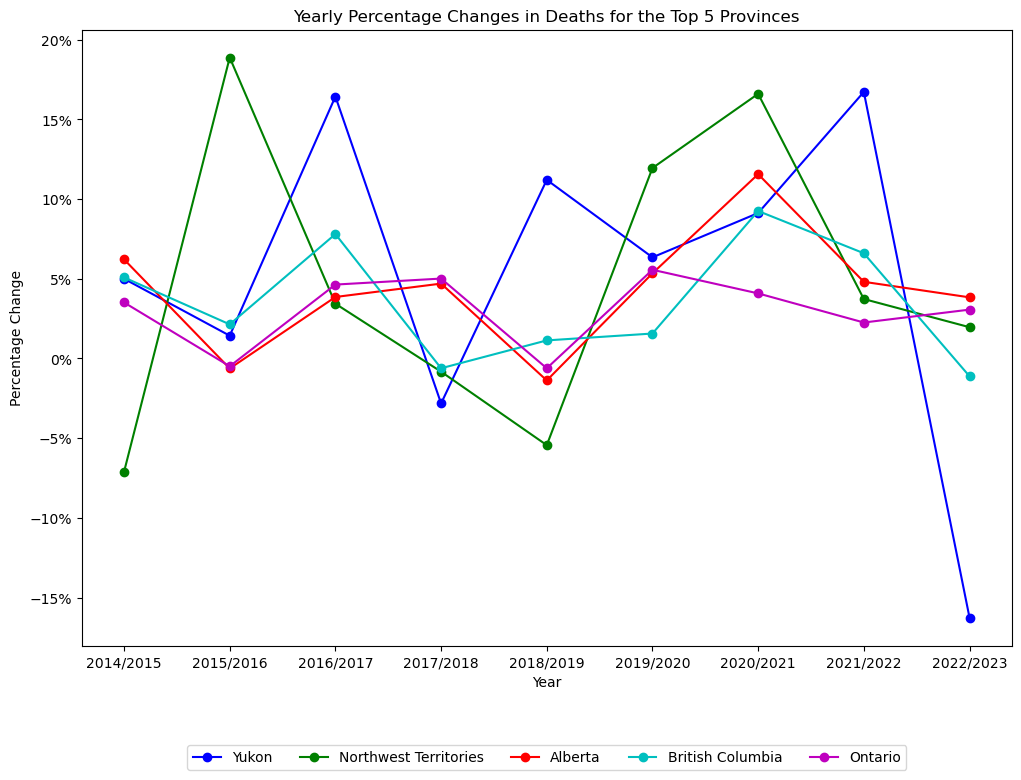

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

aggregated_data = data.pivot(index=['Province', 'Year'], columns='Components of population growth', values='Persons').reset_index()

# Fill missing values with 0 (if any)
aggregated_data.fillna(0, inplace=True)

# Calculate the percentage change in deaths for each province
death_data = aggregated_data[['Province', 'Year', 'Deaths']]
death_data['Percentage Change'] = death_data.groupby('Province')['Deaths'].pct_change() * 100

# Step 3: Calculate the average percentage change for each province
average_changes = death_data.groupby('Province')['Percentage Change'].mean().reset_index()

# Select the top 5 provinces based on the average percentage change
top5_provinces = average_changes.nlargest(5, 'Percentage Change')['Province']

# Step 4: Create a line graph with different lines for the top 5 provinces
plt.figure(figsize=(12, 8))

# Define a list of line colors for the top 5 provinces
colors = ['b', 'g', 'r', 'c', 'm']

# Plot each province's data with a different line color
for i, province in enumerate(top5_provinces):
    province_data = death_data[death_data['Province'] == province]

    # Cycle through colors to ensure enough colors for the top 5 provinces
    color = colors[i]

    plt.plot(province_data['Year'], province_data['Percentage Change'], marker='o', label=province, color=color)

plt.title('Yearly Percentage Changes in Deaths for the Top 5 Provinces')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.grid(False)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_30004\1367842885.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Persons'].pct_change() * 100


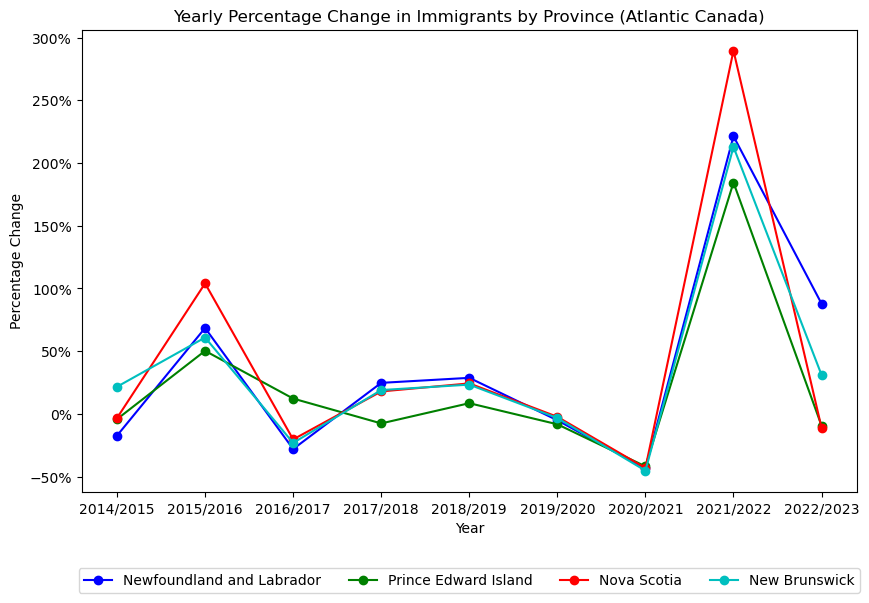

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Atlantic Canada
atlantic_data = data[data['Province'].isin(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick'])]

# Calculate the percentage change in immigrants for each province
immigrant_data = atlantic_data[atlantic_data['Components of population growth'] == 'Immigrants']
immigrant_data['Percentage Change'] = immigrant_data.groupby('Province')['Persons'].pct_change() * 100

# Create a line graph for each province
provinces = immigrant_data['Province'].unique()
colors = ['b', 'g', 'r', 'c']  # Define colors for provinces
plt.figure(figsize=(10, 6))

for i, province in enumerate(provinces):
    province_data = immigrant_data[immigrant_data['Province'] == province]
    plt.plot(province_data['Year'], province_data['Percentage Change'], marker='o', label=province, color=colors[i])

plt.title('Yearly Percentage Change in Immigrants by Province (Atlantic Canada)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(False)
plt.show()


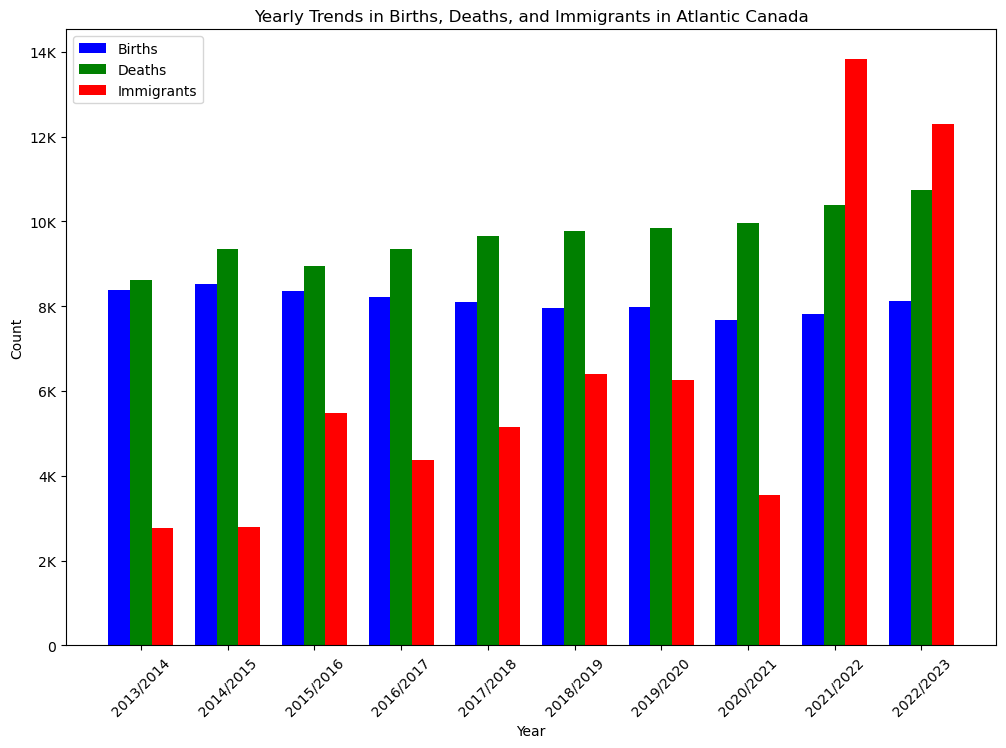

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data for Atlantic Canada
atlantic_data = data[data['Province'].isin(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick'])]

# Create a grouped bar chart for each year
years = atlantic_data['Year'].unique()
components = ['Births', 'Deaths', 'Immigrants']
bar_width = 0.25
index = np.arange(len(years))

plt.figure(figsize=(12, 8))

# Define colors for bars
colors = ['b', 'g', 'r']

legend_labels = ['Births', 'Deaths', 'Immigrants']
legend_handles = []

for i, year in enumerate(years):
    year_data = atlantic_data[atlantic_data['Year'] == year]

    for j, component in enumerate(components):
        component_data = year_data[year_data['Components of population growth'] == component]

        # Calculate the x-position for the bars
        x_position = index[i] + j * bar_width

        plt.bar(
            x_position, component_data['Persons'], bar_width, color=colors[j]
        )

    # Add the legend handles for each component
    if i == 0:
        for j, component in enumerate(components):
            legend_handles.append(plt.bar(0, 0, 0, color=colors[j], label=legend_labels[j]))

# Adjust the x-axis labels
plt.xticks(index + bar_width, years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Trends in Births, Deaths, and Immigrants in Atlantic Canada')
plt.grid(False)
def format_y_ticks(x, pos):
    if x >= 1000:
        return f'{int(x / 1000)}K'
    return str(int(x))

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_y_ticks))

# Create a legend with the specified handles and labels
plt.legend(handles=legend_handles, labels=legend_labels)

plt.show()
